<h2>About</h2>

In this notebook, we will be conducting multiple line linear regression on a dataset. Linear regression is an integral part of machine learning. The dataset contains 5000 rental listings from New York City, from the boroughs Manhattan, Brooklyn and Queens. Dataset is taken from StreetEasy and it is available under the Creative Commons Attribution 4.0 International License. Let's get started! 

In [63]:
#import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#load pandas dataframe from a .csv-file
df = pd.read_csv('streeteasy.csv')

#see what kind of values the dataframe has
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


Next we will prepare for the actual linear regression test. The dataframe will be split into our x and y variables, and we will be using a 80/20 train/test ratio.Our x-values will be all the numerical values of the dataframe, except 'rent', which will be our y-value. Train/test ratio means that the algorithm well be taught 80% of the data, and based on this data it will try to predict the y-values of the remaining 20%.

In [64]:
#define x as all the columns of the dataset except rent. This is because we will be using rent as the dependent variable, and
#the others as the independent variables. Categorical variables such as neighbourhood or borough will not be included in the test.
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway','building_age_yrs', 'floor', 'no_fee', 'has_roofdeck',
        'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']] #define y as the rent column of the dataset

#define x_train, x_test and y_train, y_test as percentages of the x and y datasets. 80% of the datasets will be the train set and 20% will be the test set.
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size=0.8, test_size= 0.2)

#print to see how many rows and columns there will be in each set.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000, 1)
(1000, 1)


In [65]:
mlr = LinearRegression()#define the LinearRegression function as mlr for easier use
mlr.fit(x_train, y_train)#fits our x_train and y_train values into the equation, finds the coefficients and the intercept value

#takes the values calculated by .fit and the x_test values, plugs them into them into the multiple linear regression equation and
#calculates the predicted y_valujes
y_predict = mlr.predict(x_test)

#x_values for the apartment listed at index number 3
apartment_3 = [[1, 1, 916, 2, 51, 29, 0, 1, 0, 1, 1, 1, 0, 0]]

#insert the values to get the predicted rent, according to the algorithm. Actual rent of apartment is $4500. Less than predicted.
predict = mlr.predict(apartment_3)
print(predict)

[[5305.17258011]]


Text(0.5, 1.0, 'Actual Rent vs predicted rent')

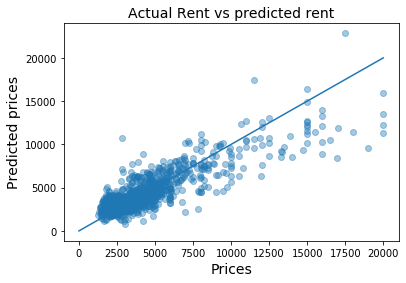

In [66]:
#plot the predicted prices against the actual prices, and plot regression as a line in the graph
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot(range(20000), range(20000))
plt.xlabel('Prices', fontsize=14)
plt.ylabel('Predicted prices', fontsize= 14)
plt.title('Actual Rent vs predicted rent', fontsize=14)


In [67]:
print(mlr.coef_)#the effect of independent variables on results

[[-447.89109264 1319.14512521    4.66748477  -15.8064858    -4.13044964
    39.56204233  -72.24776012   43.17200148  144.54045234    9.29643679
   174.044875     61.1210352    -2.68646979  -59.44370469]]


In [68]:
print(mlr.score(x_train, y_train))#the accuracy of the training set
print(mlr.score(x_test, y_test))#the accuracy of the testing set

0.7346920319026571
0.7199768767250091


Coefficients mean the effect of independent variables on results. The higher the value, the bigger the effect. If the values are negative, there is a negative correlation between the independent variable and the dependent variable, meaning that when the other rises the other lowers.
The .score method gives us the accuracy of our sets. 1.0 is a perfect score, meaning that our variables together explain 100% of the variation. You can try to raise this score by removing or adding variables to the equation. Generally, a score of 0.70 and above is considered good.

<h2>Conclusion</h2>
Multiple linear regression means modeling between one dependent variable and multiple independent variables. In this case, we used the rent of an apartment in NYC as the dependent variable and many others, such as apartment size and number of bedrooms as independent variables. We then applied the linear regression algorithm with these variables and tried to predict the outcomes.
The x-data we used accounted for roughly 70% of the variation, which is considered good. We can try to increase this percentage by adding or removing variables.
